# Scoring


This notebook contains code used for the evaluation in term of score and precision of the VOT challenge.


In [1]:
%%writefile scoring.py

import numpy as np

Writing scoring.py


## Precision


In [2]:
%%writefile -a scoring.py

def get_precision(pred, target):
    try:
        xp, yp, wp, hp = pred
        xt, yt, wt, ht = target

        # Compute the intersection
        xi = max(xp, xt)
        yi = max(yp, yt)
        wi = min(xp + wp, xt + wt) - xi
        hi = min(yp + hp, yt + ht) - yi

        # Compute the union
        xu = min(xp, xt)
        yu = min(yp, yt)
        wu = max(xp + wp, xt + wt) - xu
        hu = max(yp + hp, yt + ht) - yu

        # Compute the intersection over union
        if wi <= 0 or hi <= 0:
            iou = 0
        else:
            iou = wi * hi / (wu * hu)

        return iou
    except:
        return 0

Appending to scoring.py


## Success


In [3]:
%%writefile -a scoring.py

def is_success(pred, target):
    def get_center(x, y, w, h):
        return x + 0.5 * w, y + 0.5 * h

    def get_distance(x1, y1, x2, y2):
        return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    try:
        xp, yp, wp, hp = pred
        xt, yt, wt, ht = target

        xcp, ycp = get_center(xp, yp, wp, hp)
        xct, yct = get_center(xt, yt, wt, ht)

        distance = get_distance(xcp, ycp, xct, yct)

        return distance < 20
    except:
        return False

Appending to scoring.py


### Prof of concept


In [4]:
from scoring import get_precision, is_success
import matplotlib.pyplot as plt
import cv2

In [5]:
def visualize_prediction(pred, target):
    img = plt.imread("poc/0065.jpg")

    xp, yp, wp, hp = pred
    xt, yt, wt, ht = target

    cv2.rectangle(img, (xp, yp), (xp + wp, yp + hp), (0, 255, 0), 2)
    cv2.rectangle(img, (xt, yt), (xt + wt, yt + ht), (0, 0, 255), 2)

    precision = get_precision(pred, target)
    success = is_success(pred, target)

    plt.imshow(img)
    plt.title(f"Succes : {success} - Precision : {precision:.2f}")
    plt.show()

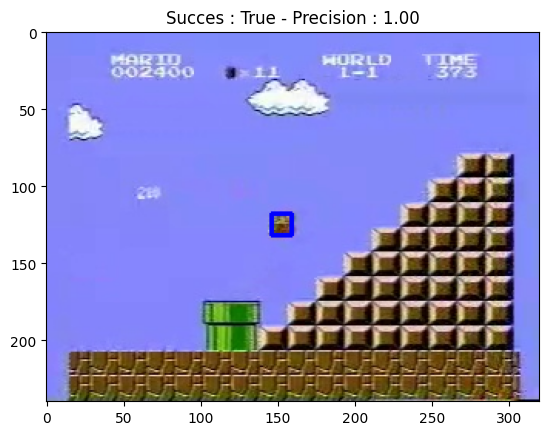

In [6]:
pred = 146, 118, 13, 14
target = 146, 118, 13, 14

visualize_prediction(pred, target)

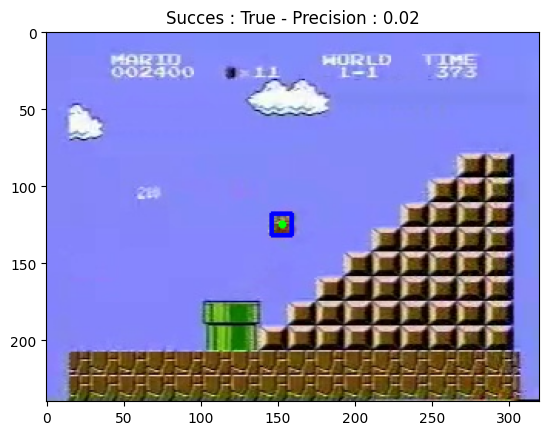

In [7]:
pred = 152, 124, 2, 2
target = 146, 118, 13, 14

visualize_prediction(pred, target)

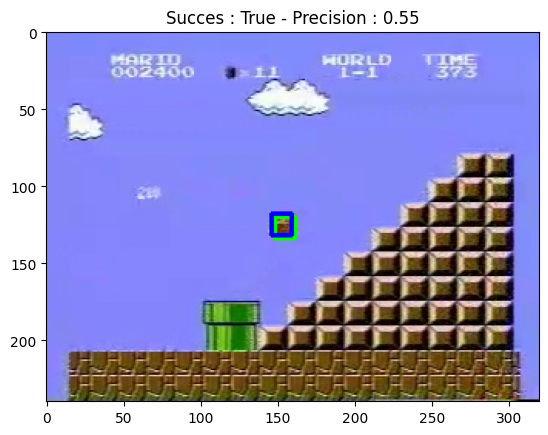

In [8]:
target = 146, 118, 13, 14
pred = 148, 120, 13, 14

visualize_prediction(pred, target)